In [1]:
import pandas as pd
df = pd.read_csv('coins_data.xlsx - Sheet1.csv')
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum


In [2]:
cols = df[['MarketCap', 'Volume']]

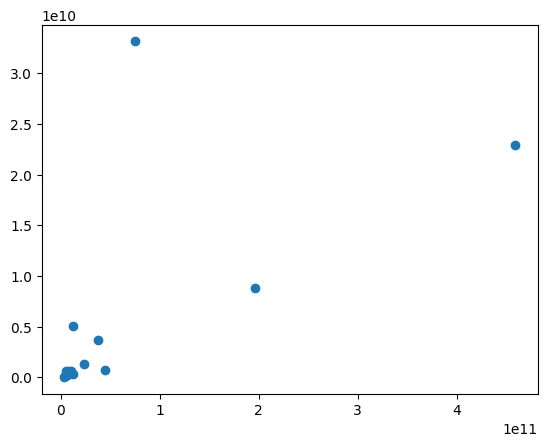

In [24]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# pairwise distances between data points
distances = pdist(cols, metric='euclidean')
square_distances = squareform(distances)
plt.scatter(df['MarketCap'], df['Volume'])

In [19]:
# hierarchial clustering
condensed_distances = squareform(square_distances)
linkage_matrix = linkage(condensed_distances, method='average')

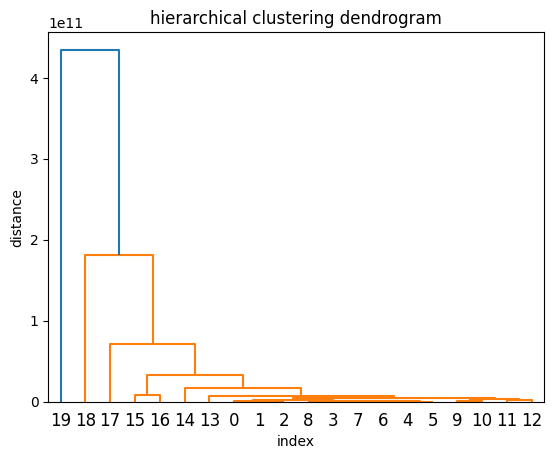

In [23]:
# dendrogram
dendrogram(linkage_matrix, labels=df.index)
plt.xlabel('index')
plt.ylabel('distance')
plt.title('hierarchical clustering dendrogram')
plt.show()

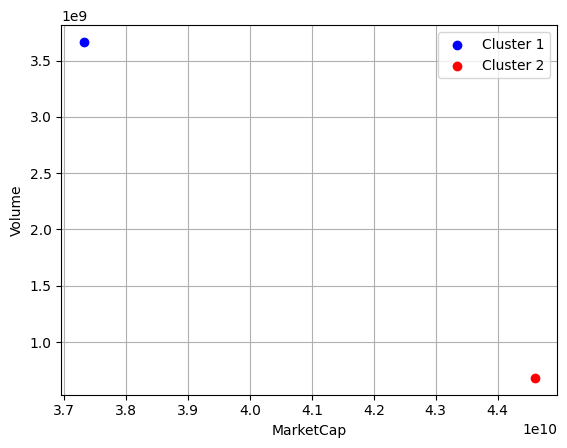

In [28]:
# Determine the height (distance) threshold for cutting
distance_threshold = 2 

# Cut the dendrogram to create clusters
cluster_assignments = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Add the cluster assignments to the original DataFrame
df['Cluster'] = cluster_assignments

cluster1_data = df[df['Cluster'] == 1]
cluster2_data = df[df['Cluster'] == 2]

# Create a scatter plot to visualize the two clusters
plt.scatter(cluster1_data['MarketCap'], cluster1_data['Volume'], label='Cluster 1', c='blue')
plt.scatter(cluster2_data['MarketCap'], cluster2_data['Volume'], label='Cluster 2', c='red')

# Add labels and legend
plt.xlabel('MarketCap')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()
